# Data Sets from the Literature

The following data sets were obtained from the literature.


## Acid \& Base hydrolysis of benzyl chloride

Refer to problem \#8 of the handout. This notebook refers to the data presented in table&nbsp;4 of the class handout.

Data for the hydrolysis of benzyl chloride were obtained from..

"Relations Entre la Constitution du Substrat et sa Sensibilité à L'ion oh dans L'hydrolyse." S.C.J. Olivier, A.P. Weber, *Recl. Trav. Chim. Pays-Bas*, **1934**, *53*, 869-890. https://doi.org/10.1002/recl.19340531002

Rates of hydrolysis are reported for substituted benzyl chlorides in the following conditions.

1. 50% Acetone, in acidic conditions
2. 50% Acetone, 0.0506 M NaOH
3. 50% Acetone, 0.104 M NaOH
4. 50% Acetone, 0.259 M NaOH

All performed at $30 ^\circ C$

**Note:** 
- The acidic conditions were 0.052, 0.27 and 0.50 M H2SO4 and the rate constants were constant in value across that range.  
- The rate constants for acidic conditions are first-order in [BzCl] and are reported in units of /$10^{-5} min^{-1}$.
- The rate constants for basic conditions are first-order in [BzCl] and are reported in units of /$10^{-5} min^{-1}$ for each of the concentrations of hydroxide. These could be made into the second order rate constant by dividing by the concentration of hydroxide reactant in each series.

### Cleaning Data Set

The code below will extract and clean the data from the database for use in this analysis.

In [7]:
####################################################
### Import Libraries and set up global variables ###
####################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_14/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

sigmatype = "sigma"          # sigmatype can be one of ["sigma", "s_plus", "s_minus"]

#################################################################
### a function to fill in sigma for empty spaces in s+ and s- ###
#################################################################

def fill_sigma(df):     
    for z in df.index:
        if np.isnan(df.loc[z,"s_plus"]):
            df.loc[z,"s_plus"] = df.loc[z,"sigma"]
        if np.isnan(df["s_minus"][z]):
            df.loc[z,"s_minus"] = df.loc[z,"sigma"]
    return(df)

In [8]:
Data_Set = "data/Table_4_Data.csv"

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################

Filename = github_location + Data_Set

df1 = pd.read_csv(Filename,
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 







display(df1)

,k_H2O,k_0.05,k_0.10,k_0.26
Substituent,,,,
H,2.20,17.0,31,61
p-CH3,19.00,38.0,58,94
o-CH3,9.40,42.0,68,127
m-CH3,2.60,33.2,28,53
p-Br,1.09,17.0,34,64
o-Br,0.58,11.0,22,47
m-Br,0.41,9.0,17,37
m-CN,0.27,17.0,33,68
p-CN,0.25,22.0,43,92


## Hammett Parameters from A. Williams
This table presents the Hammett $\sigma$ LFER values collected values presented in the collection curated by A. Williams in his book, “Free Energy Relationships in Organic and Bio-organic Chemistry”, *The Royal Society of Chemistry, Cambridge*, **2003**, pp 258-277. https://doi.org/10.1039/9781847550927.

 The data series are as follows:
 
- **Substituent**
     - The code of the substituent and the **index series**. Hopefully we will use a unique code for each substituent that will apply across all these data tables. Students should use data cleaning methods to track down duplicate data and mismatched codes.
- **sigma**
    - The Hammett $\sigma$ value
- **s_plus**
    - The Brown-Okamoto $\sigma_p^+$ value
- **s_minus**
    - The Brown-Okamoto $\sigma_p^-$ value
- **Page**
    - The page number in book. This is included to enable faster checking of the data by other students (all errors are intentional - to see if they are paying attention.)
    
**Note:** You may also use the Hansch data set available from the GitHub page.

### Cleaning Data Set

the code below will extract and clean the data from the database for use in  this analysis.

In [9]:
################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################

LFER_Data = "LFER_HanschLeoTaft.csv"   # Choose which set of Hammett parameters you prefer
#LFER_Data = "LFER_Williams.csv"

Filename = github_location_LFER_tables + LFER_Data

df2 = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 
#display(df)

########################################################
### Fill across sigma values and select substituents ###
########################################################

df2 = fill_sigma(df2)
#display(df2)

###############################
### Remove unneeded columns ###
###############################
 
df2.drop(labels = ["TABLE V", "TABLE I"],    #Trim "LFER_HanschLeoTaft.csv" data
#df2.drop(labels = ["Page"],                   #Trim "LFER_Williams.csv"" data
        axis = 1,
        inplace = True)
#print(df2)
#df2.sort_values(by=['sigma'], inplace=True)
#display(df2)

## Combine Data Sets

Both data sets are indexed by "Substituent". The code below will combine the two data sets according to "Substituent" and take the intersection of the sets.

In [10]:
result = pd.concat([df2, df1], axis=1, join="inner")
display(result)

,sigma,s_plus,s_minus,k_H2O,k_0.05,k_0.10,k_0.26
Substituent,,,,,,,
m-Br,0.39,0.39,0.39,0.41,9.0,17,37
p-Br,0.23,0.15,0.25,1.09,17.0,34,64
m-CH3,-0.07,-0.07,-0.07,2.60,33.2,28,53
p-CH3,-0.17,-0.31,-0.17,19.00,38.0,58,94
m-CN,0.56,0.56,0.56,0.27,17.0,33,68
p-CN,0.66,0.66,1.00,0.25,22.0,43,92
H,0.00,0.00,0.00,2.20,17.0,31,61


## Calculations

The rates are reported in units of $10^{-5} min^{-1}$.  They will be converted to $min^{-1}$ by multiplying the values by $10^{-5}$. Then the log values will be calculated for the log-log Hammett plots.

See the code below.

In [11]:
result_copy = result.copy()  # copy the data set into a new data structure so the original will not change

result_copy["k_H2O"] = result_copy["k_H2O"]*(10**(-5))
result_copy["k_0.05"] = result_copy["k_0.05"]*(10**(-5))
result_copy["k_0.10"] = result_copy["k_0.10"]*(10**(-5))
result_copy["k_0.26"] = result_copy["k_0.26"]*(10**(-5))
result_copy["log_k_H2O"] = np.log10(result_copy["k_H2O"])
result_copy["log_k_0.05"] = np.log10(result_copy["k_0.05"])
result_copy["log_k_0.10"] = np.log10(result_copy["k_0.10"])
result_copy["log_k_0.26"] = np.log10(result_copy["k_0.26"])
display(result_copy)

#result_copy.drop(labels = ["p-CH3"], axis = 0, inplace = True)

,sigma,s_plus,s_minus,k_H2O,k_0.05,k_0.10,k_0.26,log_k_H2O,log_k_0.05,log_k_0.10,log_k_0.26
Substituent,,,,,,,,,,,
m-Br,0.39,0.39,0.39,0.000004,0.000090,0.00017,0.00037,-5.387216,-4.045757,-3.769551,-3.431798
p-Br,0.23,0.15,0.25,0.000011,0.000170,0.00034,0.00064,-4.962574,-3.769551,-3.468521,-3.193820
m-CH3,-0.07,-0.07,-0.07,0.000026,0.000332,0.00028,0.00053,-4.585027,-3.478862,-3.552842,-3.275724
p-CH3,-0.17,-0.31,-0.17,0.000190,0.000380,0.00058,0.00094,-3.721246,-3.420216,-3.236572,-3.026872
m-CN,0.56,0.56,0.56,0.000003,0.000170,0.00033,0.00068,-5.568636,-3.769551,-3.481486,-3.167491
p-CN,0.66,0.66,1.00,0.000003,0.000220,0.00043,0.00092,-5.602060,-3.657577,-3.366532,-3.036212
H,0.00,0.00,0.00,0.000022,0.000170,0.00031,0.00061,-4.657577,-3.769551,-3.508638,-3.214670


Basic hydrolysis
slope = 0.002 +/- 0.194
intercept = -3.193 +/- 0.073
rsq = 1.33e-05
p = 0.994

Acidic solvolysis
slope = -1.965 +/- 0.322
intercept = -4.477 +/- 0.121
rsq = 0.882
p = 0.00171



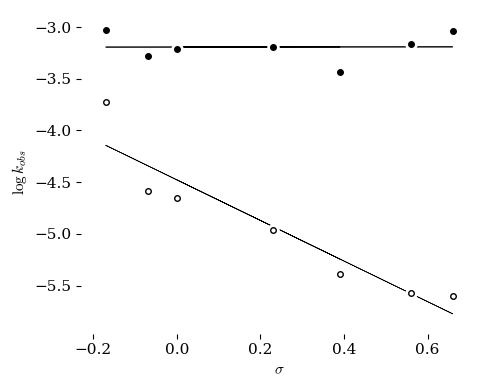

In [12]:
##########################################################################
### a function to print out the statistical parameters from a line fit ###
##########################################################################


def Report(comment, result):
    print(comment)
    print(f"slope = {result.slope:-.3f} +/- {result.stderr:.3f}")
    print(f"intercept = {result.intercept:-.3f} +/- {result.intercept_stderr:.3f}")
    print(f"rsq = {(result.rvalue)**2:-.3}")
    print(f"p = {(result.pvalue):-.3}")
    print("")

#####################################################################
### Plot the data for one of the alkaline hydrolysis experiments  ###
#####################################################################

x = result_copy[sigmatype]

y = result_copy["log_k_0.26"]

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"

style_name = github_location_styles + style
plt.style.use(style_name) 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)


if sigmatype == "s_plus":
    x_label = r"$\sigma^+$"
elif sigmatype == "s_minus":
    x_label = r"$\sigma^-$"
elif sigmatype == "sigma":
    x_label = r"$\sigma$"
else:
    x_label = "ERROR"

ax.set(
#    title="Initial Rate Log-Log Plot",       
          ylabel=r"$\log{k_{obs}}$", 
          xlabel=x_label,                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
         )

linfit = linregress(x,y)
fity = linfit.slope * x + linfit.intercept
ax.plot(x, fity, color='black', zorder=1, linewidth=0.5)
ax.scatter(x,y, s=64, color="white", zorder=3)
ax.scatter(x,y, s=16, color="black", zorder=3)

Report("Basic hydrolysis", linfit)

#################################################################
### Plot the data for one of the acid hydrolysis experiments  ###
#################################################################

x = result_copy[sigmatype]

y = result_copy["log_k_H2O"]

linfit = linregress(x,y)
fity = linfit.slope * x + linfit.intercept
ax.plot(x, fity, color='black', zorder=1, linewidth=0.5)
ax.scatter(x,y, s=64, color="white", marker='o', zorder=3)
ax.scatter(x,y, s=16, color="white", edgecolor = "black", marker='o', zorder=3)

Report("Acidic solvolysis", linfit)

plt.show()
#fig.savefig("plot.pdf") 

